In [22]:
#Setting up modules
import cv2
import time
import numpy as np
import pathlib
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
#Setting up datasets
data_train = pd.read_csv("Emergency_Vehicles/train.csv")
data_train.head()

image_names  emergency_or_not
0    1503.jpg                 0
1    1420.jpg                 0
2    1764.jpg                 0
3    1356.jpg                 0
4    1117.jpg                 0

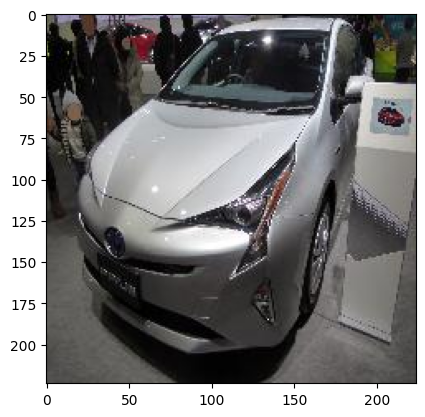

In [6]:
#Viewing images
training_df = "Emergency_Vehicles/train.csv"
image_directory = "Emergency_Vehicles/test/"

num_images_to_display = 20
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
for index, ax in enumerate(axes.flat):
    if index < num_images_to_display:
        image_name = predictions_df.iloc[index]['image_names']
        prediction = predictions_df.iloc[index]['prediction']

        # Load and display the image
        img_path = images_directory + image_name
        img = mpimg.imread(img_path)

        ax.imshow(img)
        ax.set_title(f"Prediction: {prediction}")
        ax.axis('off')
plt.tight_layout()
plt.show()

In [7]:
#Preprocessing images  - Image to array
def preprocessing_img(file_path):
    img = load_img(f"Emergency_vehicles/train/{file_path}",target_size=(224,224))
    
    img_array = img_to_array(img)
    img_array /= 255.0
    return img_array

data_train["img_array"] = data_train["image_names"].apply(preprocessing_img)
data_train.head()

image_names  emergency_or_not  \
0    1503.jpg                 0   
1    1420.jpg                 0   
2    1764.jpg                 0   
3    1356.jpg                 0   
4    1117.jpg                 0   

                                           img_array  
0  [[[0.36862746, 0.3764706, 0.2901961], [0.38431...  
1  [[[0.84705883, 0.9137255, 0.9764706], [0.85098...  
2  [[[0.24313726, 0.2509804, 0.2], [0.22352941, 0...  
3  [[[0.7647059, 0.84705883, 0.7176471], [0.62352...  
4  [[[0.0, 0.03137255, 0.0], [0.1254902, 0.160784...

In [8]:
#Setting up Dense Neural Network
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# Compling Neural Network
model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=['accuracy'])

In [10]:
#Fitting dataSets
x_train = np.array(data_train['img_array'].tolist())
y_train = np.array(data_train['emergency_or_not'])
model.fit(x_train,y_train,epochs=10, batch_size=32)

Epoch 1/10


52/52 [==============================] - 28s 514ms/step - loss: 0.6943 - accuracy: 0.6695
Epoch 2/10
52/52 [==============================] - 27s 528ms/step - loss: 0.4634 - accuracy: 0.7825
Epoch 3/10
52/52 [==============================] - 26s 508ms/step - loss: 0.3691 - accuracy: 0.8439
Epoch 4/10
52/52 [==============================] - 27s 524ms/step - loss: 0.2336 - accuracy: 0.9010
Epoch 5/10
52/52 [==============================] - 27s 527ms/step - loss: 0.1771 - accuracy: 0.9307
Epoch 6/10
52/52 [==============================] - 28s 546ms/step - loss: 0.0877 - accuracy: 0.9654
Epoch 7/10
52/52 [==============================] - 27s 525ms/step - loss: 0.0599 - accuracy: 0.9775
Epoch 8/10
52/52 [==============================] - 26s 500ms/step - loss: 0.0291 - accuracy: 0.9927
Epoch 9/10
52/52 [==============================] - 26s 498ms/step - loss: 0.0264 - accuracy: 0.9921
Epoch 10/10
52/52 [==============================] - 26s 498ms/step - loss: 0.0538 - accu

In [11]:
#Testing Datasets
data_test =pd.read_csv("Emergency_Vehicles/test.csv")
data_test.head()

image_names
0    1960.jpg
1     668.jpg
2    2082.jpg
3     808.jpg
4    1907.jpg

In [12]:
def preprocessing_img_test(file_path):
    img = load_img(f"Emergency_vehicles/test/{file_path}",target_size=(224,224))
    
    img_array = img_to_array(img)
    img_array /= 255.0
    return img_array

data_test["img_array"] = data_test["image_names"].apply(preprocessing_img_test)
data_test.head()

image_names                                          img_array
0    1960.jpg  [[[0.47843137, 0.47058824, 0.5254902], [0.4470...
1     668.jpg  [[[0.92156863, 0.972549, 1.0], [0.92156863, 0....
2    2082.jpg  [[[0.07450981, 0.1254902, 0.05882353], [0.0235...
3     808.jpg  [[[0.105882354, 0.10980392, 0.09019608], [0.16...
4    1907.jpg  [[[0.6901961, 0.7294118, 0.69411767], [0.65882...

In [16]:
#Testing DataSets
x_test = np.array(data_test['img_array'].tolist())
y_predict = model.predict(x_test)
y_predict_binary = (y_predict > 0.5).astype(int)
data_test['prediction'] = y_predict_binary
data_test = data_test.drop('img_array',axis=1)
data_test.to_csv('Emergency_Vehicles/test.csv', index=False)

23/23 [==============================] - 3s 105ms/step


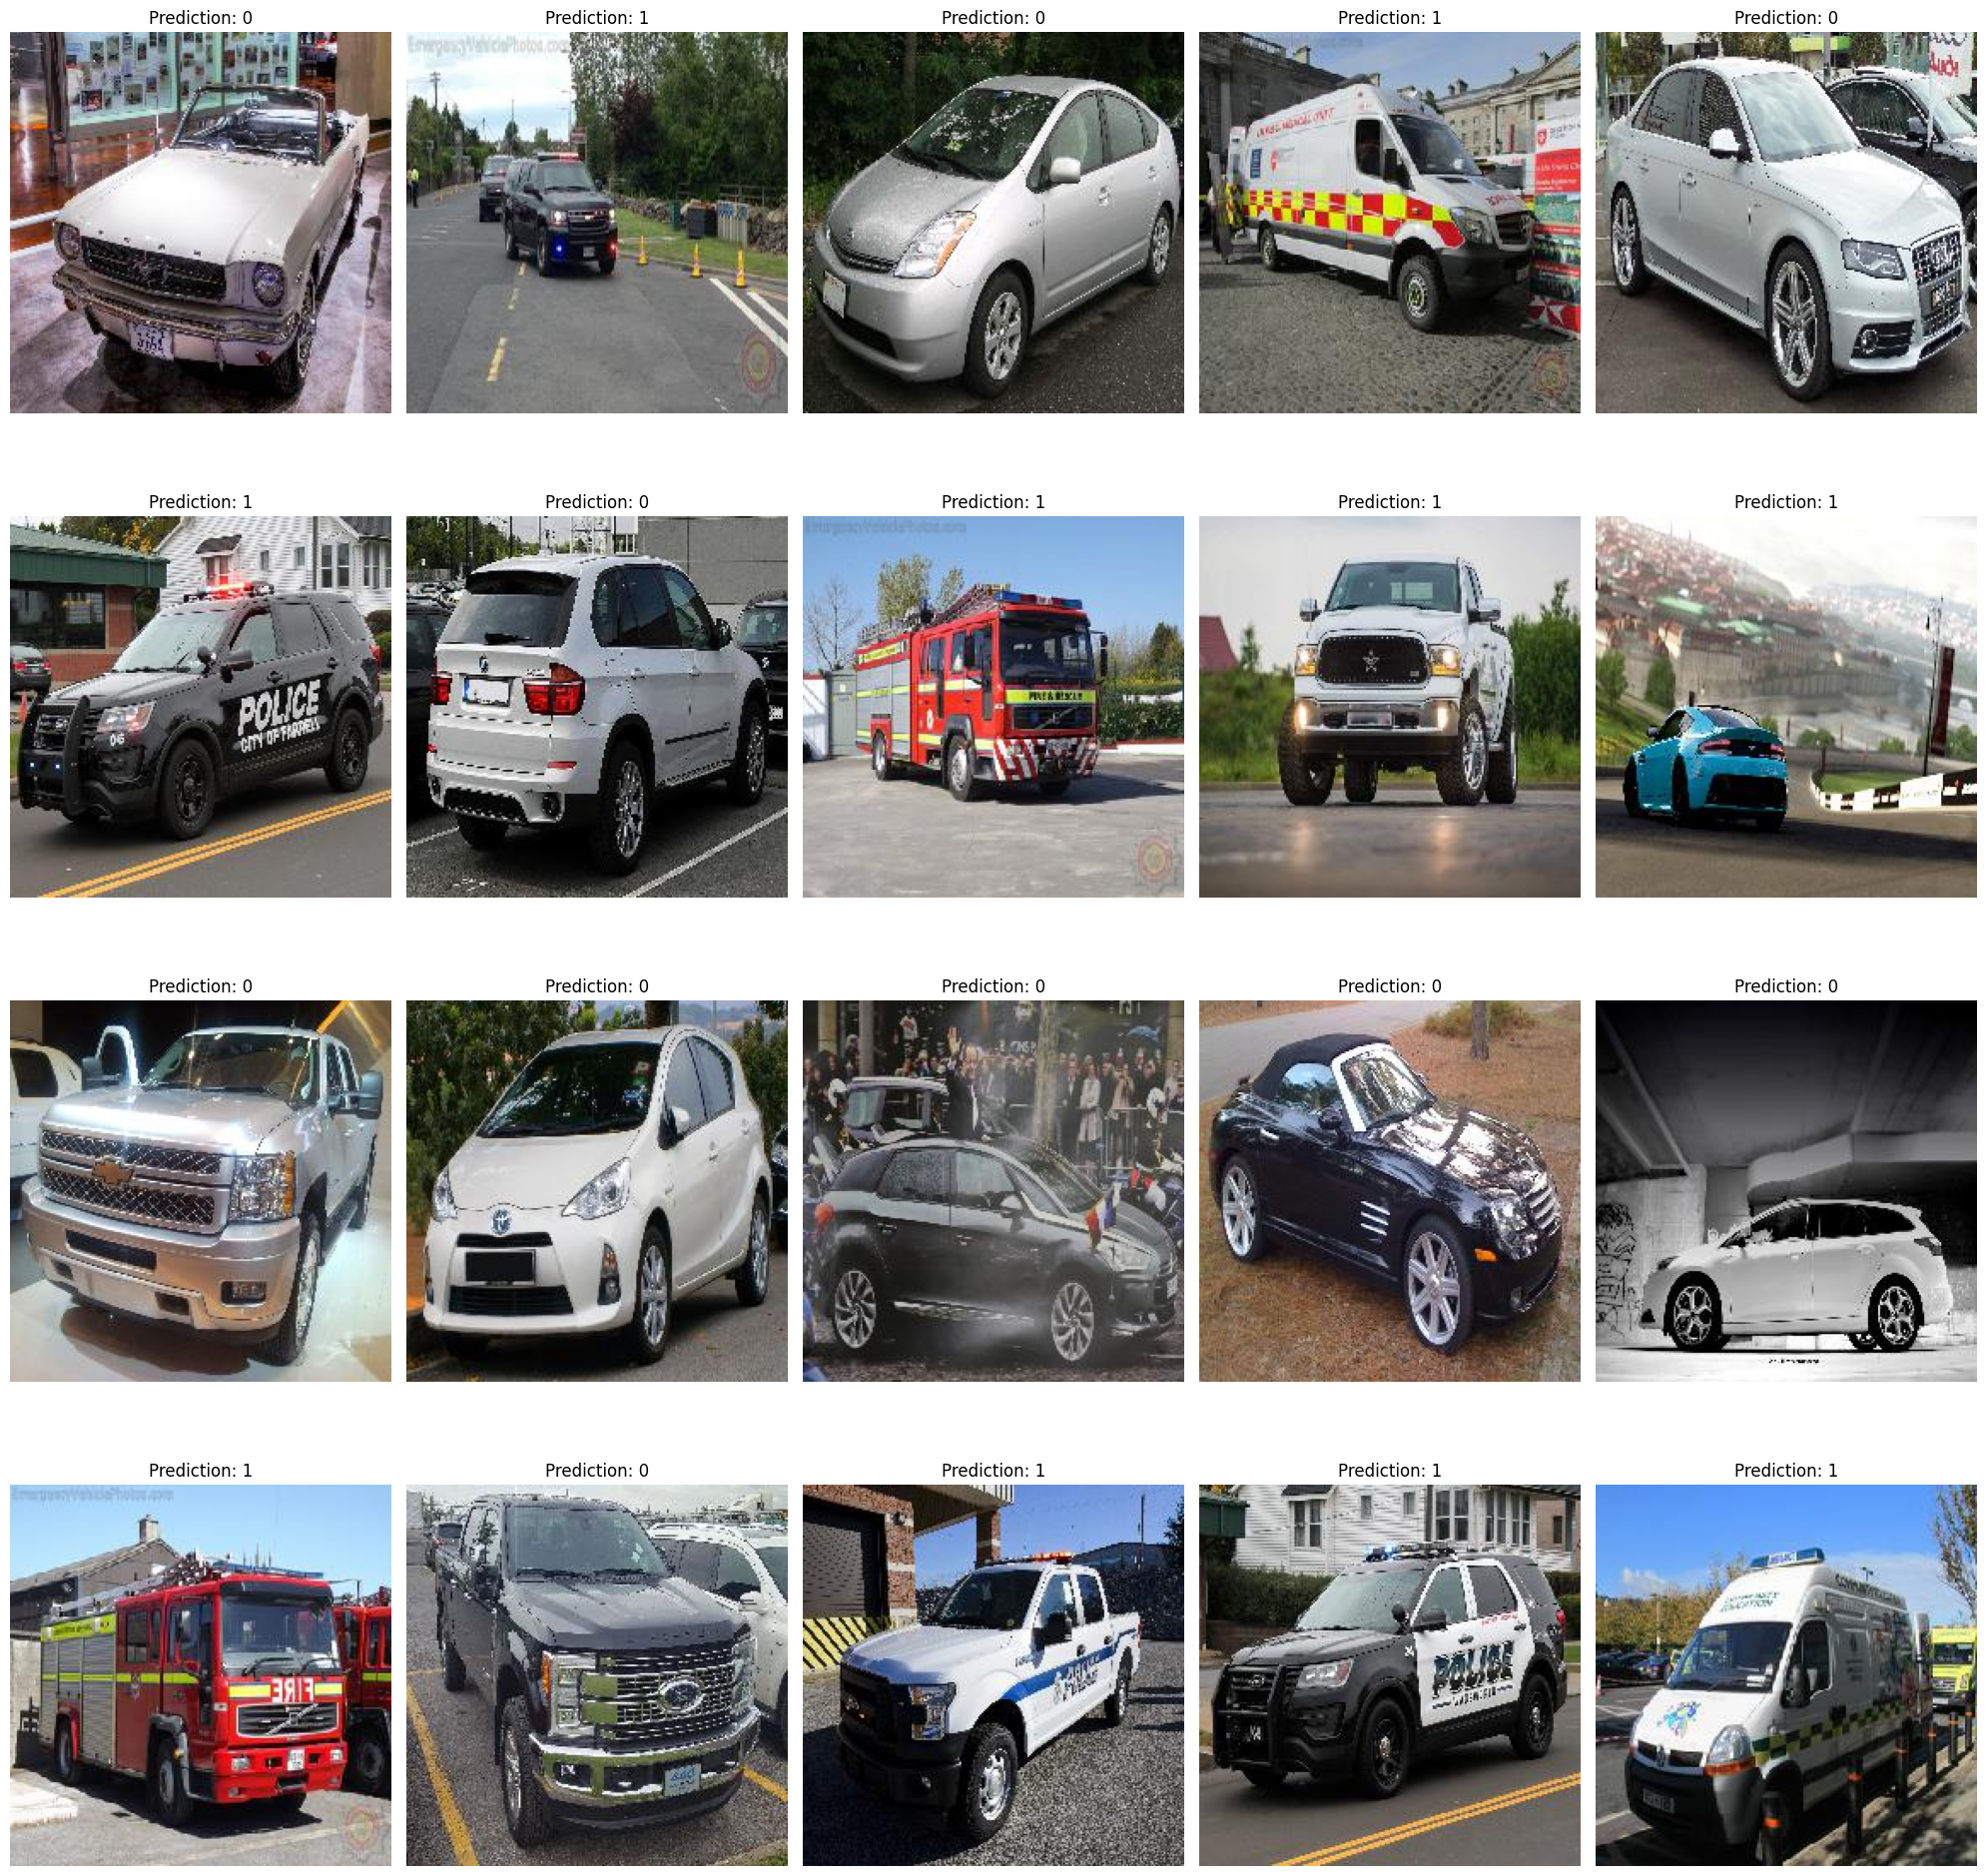

In [26]:
# Load predictions from CSV
predictions_df = pd.read_csv('Emergency_Vehicles/test.csv')
image_directory = "Emergency_Vehicles/test/"

num_images_to_display = 20
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
for index, ax in enumerate(axes.flat):
    if index < num_images_to_display:
        image_name = predictions_df.iloc[index]['image_names']
        prediction = predictions_df.iloc[index]['prediction']

        # Load and display the image
        img_path = images_directory + image_name
        img = mpimg.imread(img_path)

        ax.imshow(img)
        ax.set_title(f"Prediction: {prediction}")
        ax.axis('off')
plt.tight_layout()
plt.show()

In [14]:
#Accurancy Score 
# accuracy = accuracy_score(y_test,y_predict_binary)
# print(f"Accuracy : {accuracy*100:2f}%")
# print("Classification Report:\n",classification_report(y_test,y_predict_binary))